# This is version to aspect term extraction and aspect category detection using SATLabel framework
https://www.researchgate.net/publication/359792164_SATLabel_A_Framework_for_Sentiment_and_Aspect_Terms_Based_Automatic_Topic_Labeling

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from scipy.spatial.distance import cosine
from collections import Counter
import numpy as np
from nltk import pos_tag
import pandas as pd

In [2]:
# read preprocess dataset
df = pd.read_csv('dataset/movies_20k.csv')

In [3]:
df.head()

,index,text,label
0,0,I grew up (b. 1965) watching and loving the Th...,0
1,1,"When I put this movie in my DVD player, and sa...",0
2,2,Why do people who do not know what a particula...,0
3,3,Even though I have great interest in Biblical ...,0
4,5,A terrible movie as everyone has said. What ma...,0


In [4]:
# Make sure to download the necessary NLTK data files
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')

# Preprocess tweets
def preprocess(tweet):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(tweet.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return filtered_tokens

def aspect_sentiment(text):
    # Tokenisasi teks menjadi kata-kata individual
    tokens = word_tokenize(text)
    # Ambil daftar stop words dalam bahasa Inggris dari NLTK
    stop_words = set(stopwords.words('english'))
    # Hapus tanda baca dan ubah menjadi huruf kecil
    tokens = [word.lower() for word in tokens if word.isalnum()]
    # Tag POS pada token
    pos_tags = pos_tag(tokens)
    # Buat daftar istilah sentimen dan aspek
    sentiment_terms = []
    aspect_terms = []
    # Iterasi melalui token
    for word, tag in pos_tags:
        # Cek apakah kata tersebut merupakan stop word
        if word in stop_words:
            continue
        # Cek apakah kata tersebut merupakan adjektiva atau verba (istilah sentimen)
        if tag.startswith('JJ') or tag.startswith('VB'):
            sentiment_terms.append(word)
        # Cek apakah kata tersebut merupakan nomina (istilah aspek)
        elif tag.startswith('NN'):
            aspect_terms.append(word)
    # Menghapus duplikat dari istilah sentimen dan aspek
    sentiment_terms = list(set(sentiment_terms))
    aspect_terms = list(set(aspect_terms))
    return sentiment_terms, aspect_terms

In [5]:
tweets = df['text'].tolist()

In [12]:
# Extract sentiment and aspect terms for each tweet
data = []
for tweet in tweets:
    sentiment_terms, aspect_terms = aspect_sentiment(tweet)
    data.append({
        "Sample Tweet": tweet,
        "Sentiment Terms": ", ".join(sentiment_terms),
        "Aspect Terms": ", ".join(aspect_terms)
    })

# Create a DataFrame to display the results
df_AS = pd.DataFrame(data)
df_AS


,Sample Tweet,Sentiment Terms,Aspect Terms
0,I grew up (b. 1965) watching and loving the Th...,"became, loved, huge, get, counting, cgi, chair...","theme, score, waste, art, school, child, serie..."
1,"When I put this movie in my DVD player, and sa...","last, following, enjoyed, bad, excellent, let,...","whatever, series, review, atlantis, reviews, v..."
2,Why do people who do not know what a particula...,"replace, go, let, define, running, looks, next...","trash, moonlanding, slut, feel, meanies, compo..."
3,Even though I have great interest in Biblical ...,"biblical, bad, horrible, mixing, great, get, s...","death, point, horror, sanity, joke, everything..."
4,A terrible movie as everyone has said. What ma...,"giving, bad, murdered, made, mcnealy, antitrus...","laugh, record, front, award, involvement, publ..."
...,...,...,...
19995,"Again, I've read all of the comments posted he...","intelligent, excellent, convert, loved, increa...","living, plague, syndrome, grants, industry, ad..."
19996,This is without a doubt the funniest of the Cu...,"musical, perfect, funniest, dozens, shorts, hi...","times, doubt, comedy, stooges, example, pantom..."
19997,I first saw Thief as a child which makes me al...,"realized, korda, amazing, passed, delighted, g...","thomas, kid, years, child, mccarthy, timeless,..."
19998,This is a very fine and poetic story. Beautifu...,"japanese, last, let, gave, typical, want, poet...","colors, year, feel, score, screen, feelings, m..."


In [17]:
df_AS.to_csv('dataset/movies_24k_as.csv')

In [7]:
# Buat kamus dan matriks dokumen-term
from gensim import corpora, models
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cosine
from collections import Counter

In [6]:
preprocess_df = pd.read_csv('dataset/preprocess_movies_20k.csv')
reviews = preprocess_df['text'].apply(word_tokenize)
tweets = preprocess_df['text'].tolist()

In [8]:
# corpus = [" ".join(preprocess(text)) for text in reviews]

dictionary = corpora.Dictionary(reviews)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in reviews]

In [9]:
# Lakukan LDA
lda_model = models.LdaMulticore(doc_term_matrix, num_topics=20, id2word=dictionary, passes=15)
topics = lda_model.print_topics(num_words=10)

In [108]:
topics

[(0,
  '0.019*"film" + 0.017*"movie" + 0.009*"story" + 0.007*"character" + 0.007*"great" + 0.006*"one" + 0.005*"love" + 0.004*"like" + 0.004*"performance" + 0.004*"good"'),
 (1,
  '0.007*"great" + 0.007*"movie" + 0.006*"story" + 0.006*"like" + 0.005*"film" + 0.005*"good" + 0.005*"one" + 0.004*"character" + 0.003*"man" + 0.003*"see"'),
 (2,
  '0.026*"film" + 0.014*"movie" + 0.009*"like" + 0.008*"one" + 0.008*"time" + 0.006*"dont" + 0.006*"story" + 0.006*"see" + 0.006*"even" + 0.005*"would"'),
 (3,
  '0.013*"movie" + 0.010*"one" + 0.010*"film" + 0.007*"like" + 0.006*"character" + 0.005*"show" + 0.005*"story" + 0.005*"time" + 0.005*"would" + 0.005*"life"'),
 (4,
  '0.010*"movie" + 0.008*"one" + 0.006*"episode" + 0.006*"time" + 0.005*"love" + 0.005*"good" + 0.005*"show" + 0.005*"character" + 0.005*"see" + 0.005*"life"'),
 (5,
  '0.019*"movie" + 0.008*"film" + 0.006*"one" + 0.006*"scene" + 0.005*"like" + 0.005*"story" + 0.005*"great" + 0.004*"character" + 0.004*"time" + 0.004*"people"'),
 (

In [129]:
# Buat klaster per teks dari topik
sentiment_clusters = []
aspect_clusters = []
teks_cluster = []
for tweet in tweets:
    tokens = preprocess(tweet)
    sentiment_terms, aspect_terms = aspect_sentiment(tweet)

    bow = dictionary.doc2bow(tokens)
    topic_distribution = lda_model.get_document_topics(bow)
    dominant_topic = max(topic_distribution, key=lambda x: x[1])[0]
    teks_cluster.append((tweet, dominant_topic)) 
    # sentiment_clusters teks dan topic dominan dari teks tersebut
    sentiment_clusters.append((sentiment_terms, dominant_topic)) 
    # aspect_cluster teks dan topic dominan dari teks tersebut
    aspect_clusters.append((aspect_terms, dominant_topic))

In [192]:
aspect_terms

'film movie story character performance time actor role life director way plot love watch thing scene people lot year family'

In [130]:
# Buat klaster berdasarkan topik dominan dari seluruh sentiment cluster masing-masing teks
# Untuk suatu topic, term yang menyusunnya apa saja
sentiment_clusters_by_topic = [[] for _ in range(20)]
aspect_clusters_by_topic = [[] for _ in range(20)]

for terms, topic in sentiment_clusters:
    sentiment_clusters_by_topic[topic].extend(terms)
for terms, topic in aspect_clusters:
    aspect_clusters_by_topic[topic].extend(terms)

In [180]:
teks_cluster_by_topic = [[] for _ in range(20)]
for teks, topic in teks_cluster:
    teks_cluster_by_topic[topic].append(teks)

In [185]:
# Tentukan istilah yang paling umum dalam klaster
def top_unigrams(cluster):
    counter = Counter(cluster)
    # return counter.most_common(1)[0][0] if counter else ""
    return [term for term, _ in counter.most_common(20)]

sentiment_unigrams = [top_unigrams(cluster) for cluster in sentiment_clusters_by_topic]
aspect_unigrams = [top_unigrams(cluster) for cluster in aspect_clusters_by_topic]

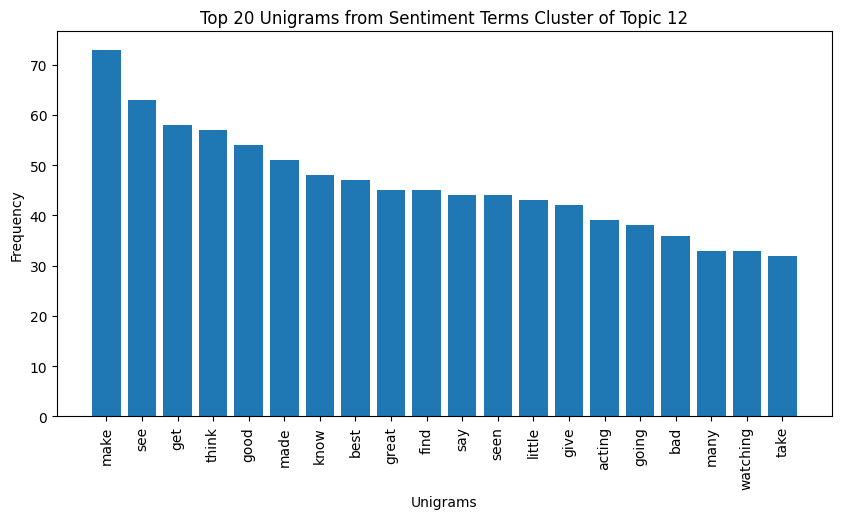

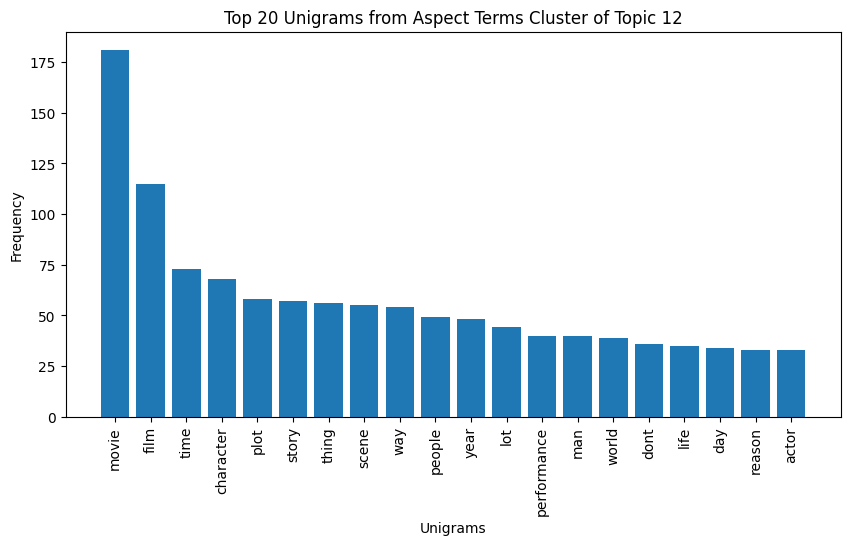

In [186]:
import matplotlib.pyplot as plt
# Menampilkan grafik Top 20 unigrams dari klaster istilah sentimen untuk topik nomor 12
topic_number = 12
if topic_number < len(sentiment_clusters_by_topic) and topic_number < len(aspect_clusters_by_topic):
    sentiment_counter = Counter(sentiment_clusters_by_topic[topic_number])
    aspect_counter = Counter(aspect_clusters_by_topic[topic_number])
    
    most_common_sentiment_unigrams = sentiment_counter.most_common(20)
    most_common_aspect_unigrams = aspect_counter.most_common(20)
    
    # Plot sentiment unigrams
    words_sentiment, counts_sentiment = zip(*most_common_sentiment_unigrams)
    plt.figure(figsize=(10, 5))
    plt.bar(words_sentiment, counts_sentiment)
    plt.xticks(rotation=90)
    plt.title(f'Top 20 Unigrams from Sentiment Terms Cluster of Topic {topic_number}')
    plt.xlabel('Unigrams')
    plt.ylabel('Frequency')
    plt.show()
    
    # Plot aspect unigrams
    words_aspect, counts_aspect = zip(*most_common_aspect_unigrams)
    plt.figure(figsize=(10, 5))
    plt.bar(words_aspect, counts_aspect)
    plt.xticks(rotation=90)
    plt.title(f'Top 20 Unigrams from Aspect Terms Cluster of Topic {topic_number}')
    plt.xlabel('Unigrams')
    plt.ylabel('Frequency')
    plt.show()
else:
    print(f"Topic number {topic_number} is out of range.")

In [123]:
topics[12]

(12,
 '0.021*"movie" + 0.008*"one" + 0.007*"film" + 0.004*"make" + 0.004*"think" + 0.004*"character" + 0.004*"like" + 0.004*"get" + 0.003*"love" + 0.003*"plot"')

In [135]:
# Label topik
topic_labels = []
tfidf_vectorizer = TfidfVectorizer()
combined_terms = [" ".join(cluster) for cluster in sentiment_clusters_by_topic + aspect_clusters_by_topic]
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_terms)

In [223]:
from itertools import product
# Menghasilkan kombinasi dari kedua daftar unigram
combined_pairs = list(product(aspect_unigrams[0], sentiment_unigrams[0]))

# Mengambil 400 pasangan kombinasi pertama
top_400_pairs = combined_pairs[:400]

print(top_400_pairs)

[('film', 'great'), ('film', 'good'), ('film', 'many'), ('film', 'make'), ('film', 'acting'), ('film', 'seen'), ('film', 'see'), ('film', 'give'), ('film', 'beautiful'), ('film', 'made'), ('film', 'little'), ('film', 'love'), ('film', 'best'), ('film', 'last'), ('film', 'wonderful'), ('film', 'much'), ('film', 'bad'), ('film', 'true'), ('film', 'young'), ('film', 'think'), ('movie', 'great'), ('movie', 'good'), ('movie', 'many'), ('movie', 'make'), ('movie', 'acting'), ('movie', 'seen'), ('movie', 'see'), ('movie', 'give'), ('movie', 'beautiful'), ('movie', 'made'), ('movie', 'little'), ('movie', 'love'), ('movie', 'best'), ('movie', 'last'), ('movie', 'wonderful'), ('movie', 'much'), ('movie', 'bad'), ('movie', 'true'), ('movie', 'young'), ('movie', 'think'), ('story', 'great'), ('story', 'good'), ('story', 'many'), ('story', 'make'), ('story', 'acting'), ('story', 'seen'), ('story', 'see'), ('story', 'give'), ('story', 'beautiful'), ('story', 'made'), ('story', 'little'), ('story', '

In [231]:
top_400_pairs[8]

('film', 'beautiful')

In [234]:
pd.DataFrame(top_400_pairs)

,0,1
0,film,great
1,film,good
2,film,many
3,film,make
4,film,acting
...,...,...
395,family,much
396,family,bad
397,family,true
398,family,young


In [230]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Label topik menggunakan unigram teratas
topic_labels = []
for i in range(20):
    sentiment_terms = sentiment_unigrams[i]
    aspect_terms = aspect_unigrams[i]
    combined_terms = sentiment_terms + aspect_terms
    
    # Ubah daftar unigram menjadi string
    combined_terms_str = " ".join(combined_terms)
    
    # Hitung vektor TF-IDF untuk string gabungan
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(tweets)
    
    # Hitung kemiripan kosinus antara vektor representasi tweet dan vektor representasi string gabungan
    similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:])
    
    # Pilih tweet yang memiliki kemiripan kosinus tertinggi
    most_similar_tweet_index = np.argmax(similarities)
    detected_label = tweets[most_similar_tweet_index]
    
    topic_labels.append(detected_label)

# Tampilkan label topik
for i, label in enumerate(topic_labels):
    print(f"Topic {i + 1}: {label}")

Topic 1: dont know chasidik movement film abouti saw film year agoi orthodox woman living orthodox chasidic community tell offended movieits far away reality scary director could least hire chasidik rabbi brief consultation making realistic movie ultra orthodoxs example meir davening morning prayer jewish wedding mikveh ritual bath customsbr movie loaded technical inaccuraciesbut bothered spiritual side orthodoxs portrayed next taliban woman powerless men ultimate ruler pleaseno one force jewish girl chuppa orthodoxsalso live law halacha clearly state man responsibility towards wifeno beating rapingalsoand man even rabbiis allowed peak woman mikvehand balanit place hand woman headwhile shes taking ritual bath idea immerse whole body one time director clearly trying bash ultra orthodoxs could least nice educated mannerbr love story cute credibledialogs long boringthe ending sucked totallyfor drama least hoping nice ending sitting felt deserved obviously someone trying make nice consciou

In [98]:
# Menentukan label untuk contoh tweet
sample_results = []
for tweet in tweets:
    tokens = preprocess(tweet)
    bow = dictionary.doc2bow(tokens)
    topic_distribution = lda_model.get_document_topics(bow)
    dominant_topic = max(topic_distribution, key=lambda x: x[1])[0]
    
    sentiment_terms, aspect_terms = aspect_sentiment(tweet)
    label_terms = " ".join(sentiment_terms + aspect_terms)
    label_vector = tfidf_vectorizer.transform([label_terms]).toarray().flatten()
    
    similarity = []
    for i, (_, terms) in enumerate(topics):
        topic_terms = " ".join([term.split('*')[1].strip('"') for term in terms.split('+')])
        topic_vector = tfidf_vectorizer.transform([topic_terms]).toarray().flatten()
        similarity.append((i, 1 - cosine(label_vector, topic_vector)))
    best_match = max(similarity, key=lambda x: x[1])
    detected_label = best_match[0]
    
    sample_results.append((tweet, dominant_topic, detected_label))

In [124]:
# Buat tabel dengan pandas
df_final = pd.DataFrame(sample_results, columns=["Sample Tweet", "Topic No.", "Detected Topic Label(SATLabel)"])
df_final

,Sample Tweet,Topic No.,Detected Topic Label(SATLabel)
0,grew 1965 watching loving thunderbird mate sch...,18,16
1,put movie dvd player sat coke chip expectation...,14,16
2,people know particular time past like feel nee...,10,2
3,even though great interest biblical movie bore...,14,8
4,terrible movie everyone said made laugh cameo ...,6,8
...,...,...,...
19995,ive read comment posted agree many intelligent...,17,10
19996,without doubt funniest curly stooge short ive ...,14,9
19997,first saw thief child make almost old jinni gu...,18,7
19998,fine poetic story beautiful scenery magnificen...,17,6
